# Latin hypercube sampling
Sigurd Carlsen October 2019

When doing baysian optimization we often want to reserve some of the early part of the optimization to pure exploration.
By default the optimizer suggests purely random samples for the first n_initial_points (10 by default). The downside to this is that there is no guarentee that these samples are spread out evenly across all the dimensions.

Introducing [Latin hypercube sampling](https://en.wikipedia.org/wiki/Latin_hypercube_sampling).

This method takes advantage of the fact that we know beforehand how many random poits we want to sample. Then these points can be "spread out" in such a way that each dimension is explored.

In [1]:
from ProcessOptimizer import Optimizer
from ProcessOptimizer.space import Space,Real, Integer
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(12)

First we create a space object with two real dimensions. Both with valid values from 0 to 1

In [2]:
SPACE = Space(
[Real(0,1),Real(0,1)]
)
SPACE

Space([Real(low=0, high=1, prior='uniform', transform='identity'),
       Real(low=0, high=1, prior='uniform', transform='identity')])

Lets initiate our optimizer with default settings. Notize that because we were "unlucky" with our random seed 6 of our 10 points have x-values ranging fom 1.9 to 3.6.

In [3]:
opt = Optimizer(SPACE, "GP", n_initial_points = 10)
samples = opt.ask(n_points = 10)
samples = np.array(samples)
samples

array([[0.29889376, 0.35492981],
       [0.7675294 , 0.5835407 ],
       [0.5677335 , 0.04922972],
       [0.10033715, 0.17867431],
       [0.21527239, 0.78984223],
       [0.25052643, 0.82747676],
       [0.30877494, 0.67522207],
       [0.35251785, 0.3424325 ],
       [0.81396514, 0.60971408],
       [0.1949291 , 0.91074599]])

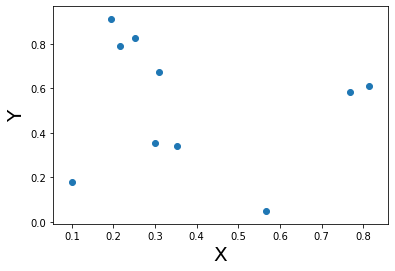

In [4]:
plt.scatter(samples[:,0],samples[:,1])
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.show()

We can instead call our optimizer with `lhs` set to True. This ensure that for each dimension the values are forced to be uniformly distributed.

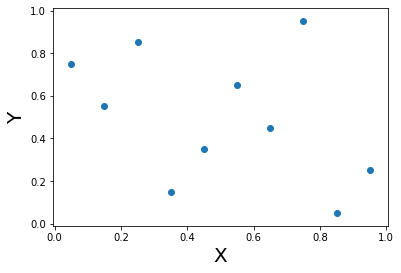

In [5]:
np.random.seed(12) # Using the same random seed as previous
opt = Optimizer(SPACE, "GP", n_initial_points = 10,lhs= True)
samples = opt.ask(n_points = 10)
samples = np.array(samples)
plt.scatter(samples[:,0],samples[:,1])
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.show()

One can also get latin hypercube sampled points by calling space directly:

In [6]:
n = 4 # numbre of points to sample
SPACE.lhs(4)

[[0.875, 0.875], [0.125, 0.375], [0.625, 0.625], [0.375, 0.125]]

Latin hypercube sampling comes with the following limitations:
- After the optimizer is initialized the sampling method for the first n_initial_points cannot be changed.
- Constraints cannot be applied while the n_initial_points of an optimizer with latin hypercube sampling have not been exhausted yet. The optimizer protects us from doing this. Example follows:

In [7]:
from ProcessOptimizer.space.constraints import Inclusive
from ProcessOptimizer.space.constraints import Constraints
try:
    opt = Optimizer(SPACE, "GP", n_initial_points = 1,lhs= True)
    opt.set_constraints([Inclusive(0, (0.1,0.5), 'real')])
except RuntimeError as error:
    print(error) # Print e
else:
    print("No error")

Can't set constraints while latin hypercube sampling points are not exhausted.


We exhaust the initial points and now constraints can be set:

In [8]:
res = opt.tell([0,0],0)
try:
    opt.set_constraints([Inclusive(0, (0.1,0.5), 'real')])
except RuntimeError as error:
    print(error)
else:
    print("No error")

No error


Example with integer dimension:

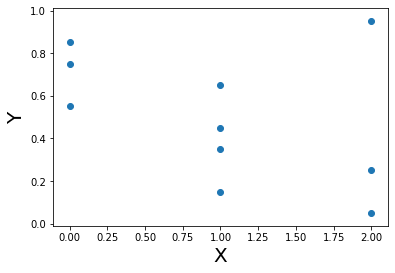

In [9]:
SPACE = Space(
[Integer(0,2),Real(0,1)]
)
np.random.seed(12) # Using the same random seed as previous
opt = Optimizer(SPACE, "GP", n_initial_points = 10,lhs= True)
samples = opt.ask(n_points = 10)
samples = np.array(samples)
plt.scatter(samples[:,0],samples[:,1])
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.show()